Missing compiler_cxx fix for MSVCCompiler


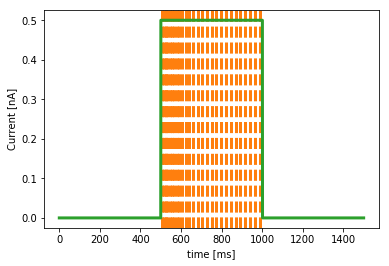

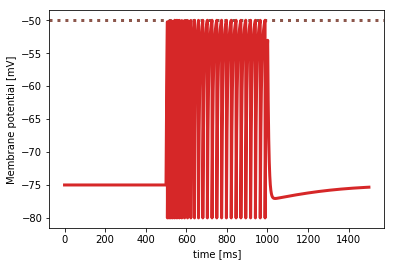

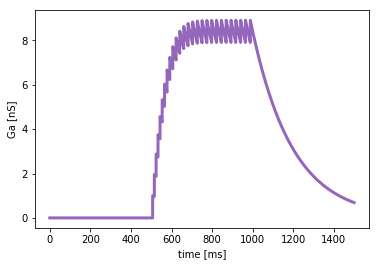

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
from brian2 import *
from neurodynex.tools import input_factory, plot_tools


# Descrição dos parâmetros do modelo
Cm = 100*pfarad # capacitância da membrana
Rm = 100*Mohm # resistência da membrana
El = -75*mV # potencial de equilíbrio da membrana
Vl = -50*mV # valor limiar de tensão de emissão de disparo
vr = -80*mV # valor de tensão de repouso após 'resetagem'
Ek = -80*mV # potencial de equilíbrio da membrana
tau_Ga = 200*ms
duration = 1500*ms
delta_Ga = 1*nsiemens

# Corrente aplicada
Ix = input_factory.get_step_current(
    t_start=500, t_end=1000, unit_time=b2.ms,
    amplitude= 500*pA) 

# Descrição do modelo neurônio 
start_scope()
G = NeuronGroup(1, model='''
dv/dt = ((El - v) / (Cm*Rm)) + ((Ga*(Ek - v)) / (Cm)) + (Ix(t,i)/Cm) : volt 
dGa/dt = -Ga/ tau_Ga : siemens''', threshold="v>Vl", reset= "v=vr; Ga=Ga+delta_Ga", method='euler', dt= 0.1*ms)

statemon = StateMonitor(G, ["v","Ga"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G) # monitor de spikes
G.v = El
G.Ga = 0

# Tempo de simulação
run(duration)

# Plot
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
plt.figure(1)
current= Ix(statemon.t,0)
plt.plot(statemon.t/b2.ms, current/b2.nA, c='C2', lw=3)
xlabel('time [ms]')
ylabel('Current [nA]')
plt.figure(2)
axhline(-50, ls=':', c='C5', lw=3)
plt.plot(statemon.t/b2.ms, statemon.v[0]/b2.mV, c='C3', lw=3)
xlabel('time [ms]')
ylabel('Membrane potential [mV]')
plt.figure(3)
plt.plot(statemon.t/b2.ms, statemon.Ga[0]/b2.nS, c='C4', lw=3)
xlabel('time [ms]')
ylabel('Ga [nS]')
plt.show()
